#Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np

#Loading W+ latent space data

In [ ]:
fully_sample_ranking_data=np.load(r'/content/gdrive/MyDrive/Personalized_Perception/Observer experiment result/experiment result/Fully sampled experiment data/Cat/cat full sample ranking score data.npy',allow_pickle=True).item()

In [ ]:
fully_sample_ranking_data.keys()

dict_keys(['Chenxi Liao', 'Eddy', 'Jesse', 'Jessica U', 'Whitney'])

In [ ]:
participant='Chenxi Liao'
participant_ranking_data=fully_sample_ranking_data['Chenxi Liao']

In [ ]:
dislike_images=[]
like_images=[]
c=0
for image,_ in sorted(participant_ranking_data.items(), key=lambda item: item[1]):
  if c < len(participant_ranking_data)//2:
    dislike_images.append(image[7:])
  else:
    like_images.append(image[7:])
  c+=1

#W+ latent space data loading

In [ ]:
fully_sample_latent_space_data=np.load(r'/content/gdrive/MyDrive/Personalized_Perception/pSp_encoder_research_2022Spring/Image latent space data/fully_sample_experiment_50_image_W+_latent_space_data_map.npy',allow_pickle=True).item()

#latent space mixinig

In [ ]:
avg_like_latent_space=np.zeros(fully_sample_latent_space_data[like_images[0]].shape)
num_of_image=len(like_images)

for img in like_images:
  avg_like_latent_space+=fully_sample_latent_space_data[img]
avg_like_latent_space/=num_of_image

In [ ]:
avg_dislike_latent_space=np.zeros(fully_sample_latent_space_data[dislike_images[0]].shape)
num_of_image=len(dislike_images)

for img in dislike_images:
  avg_dislike_latent_space+=fully_sample_latent_space_data[img]
avg_dislike_latent_space/=num_of_image

In [ ]:
avg_latent_space=np.zeros(fully_sample_latent_space_data[dislike_images[0]].shape)
num_of_image=len(like_images)+len(dislike_images)

for img_like,img_dislike in zip(like_images,dislike_images):
  avg_latent_space+=(fully_sample_latent_space_data[img_like]+avg_latent_space+fully_sample_latent_space_data[img_dislike])
avg_latent_space/=num_of_image

#W+ latent space data and label organizing

In [ ]:
latent_space_data=[]
label=[]
c=[]
for img in like_images:
  latent_space_data.append(fully_sample_latent_space_data[img].flatten())
  label.append('like')
  c.append('tab:blue')

for img in dislike_images:
  latent_space_data.append(fully_sample_latent_space_data[img].flatten())
  label.append('dislike')
  c.append('tab:red')
latent_space_data.append(avg_like_latent_space.flatten())
label.append('avg_like')
c.append('tab:orange')
latent_space_data.append(avg_dislike_latent_space.flatten())
label.append('avg_dislike')
c.append('tab:pink')
latent_space_data.append(avg_dislike_latent_space.flatten())
label.append('avg_all')
c.append('tab:gray')

In [ ]:
np.array(latent_space_data).shape

(53, 9216)

#TSNE computing

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, learning_rate=100,
             init='pca').fit_transform(np.array(latent_space_data))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
X_embedded.shape

(53, 2)

In [ ]:
import matplotlib.pyplot as plt

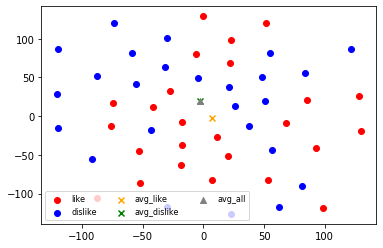

In [ ]:
label=['like','dislike','avg_like','avg_dislike','avg_all']
like=plt.scatter(X_embedded[:25,0],X_embedded[:25,1],label=label[0],marker='o',c='red')
dislike=plt.scatter(X_embedded[25:50,0],X_embedded[25:50,1],label=label[1],marker='o',c='blue')
avg_like=plt.scatter(X_embedded[50,0],X_embedded[50,1],label=label[2],marker='x',c='orange')
avg_dislike=plt.scatter(X_embedded[51,0],X_embedded[51,1],label=label[3],marker='x',c='green')
avg_all=plt.scatter(X_embedded[52,0],X_embedded[52,1],label=label[4],marker='^',c='gray')

plt.legend((like, dislike, avg_like, avg_dislike, avg_all),
           ('like','dislike','avg_like','avg_dislike','avg_all'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()